<a href="https://colab.research.google.com/github/adhityan924/SEM/blob/main/Adhityan_Project_Hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cellxgene-census
!pip install scanpy
!pip install pandas_profiling
!pip install pydantic-settings
!pip install ydata-profiling
!pip install jupyter-contrib-nbextensions
!pip install scikit-learn
!pip install igraph
!pip install scvi-tools
!pip install scikit-misc
!pip install leidenalg

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 6.8 MB/s eta 0:00:00
  Created wheel

In [2]:
import cellxgene_census
import scanpy
import sys
import urllib
import pandas as pd
import numpy as np
import tiledbsoma
from ydata_profiling import ProfileReport
from google.colab import sheets
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [3]:
urllib.request.urlretrieve('https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad', 'dataset.h5ad')

adata = scanpy.read_h5ad('dataset.h5ad')
print(adata)
obs_attributes = adata.obs.columns.tolist()  # List of obs attributes
var_attributes = adata.var.columns.tolist()  # List of var attributes

print("Obs attributes:", obs_attributes)
print("Var attributes:", var_attributes)

AnnData object with n_obs × n_vars = 23197 × 33091
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'
Obs attributes: ['nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCoun

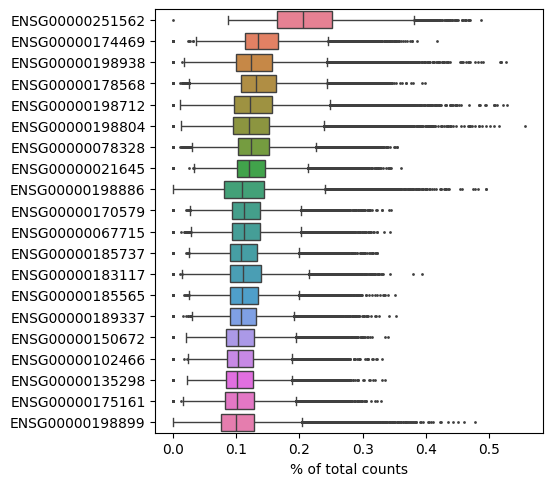

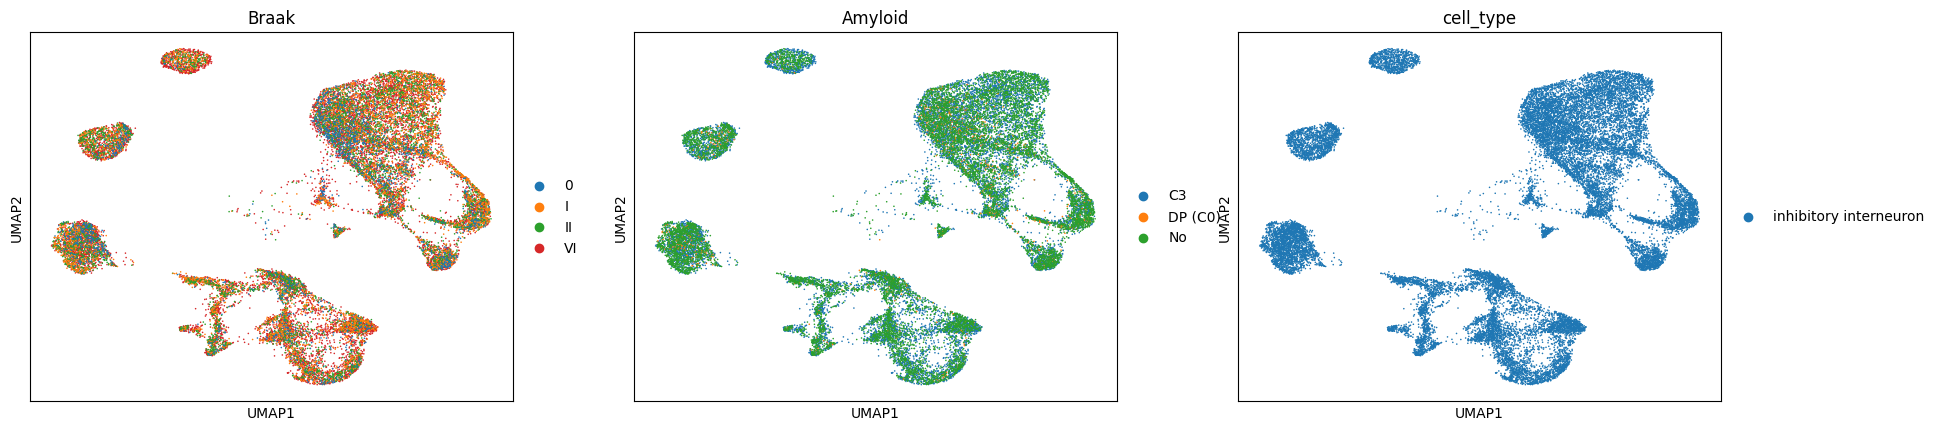

In [4]:
# Visualize the top 20 expressed genes
scanpy.pl.highest_expr_genes(adata, n_top=20)

# UMAP visualization using Braak and Amyloid scores
scanpy.pl.umap(adata, color=['Braak', 'Amyloid', 'cell_type'])

<ipython-input-5-e0510e044f18>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  / gender_disease_distribution.groupby('sex')['count'].transform('sum')


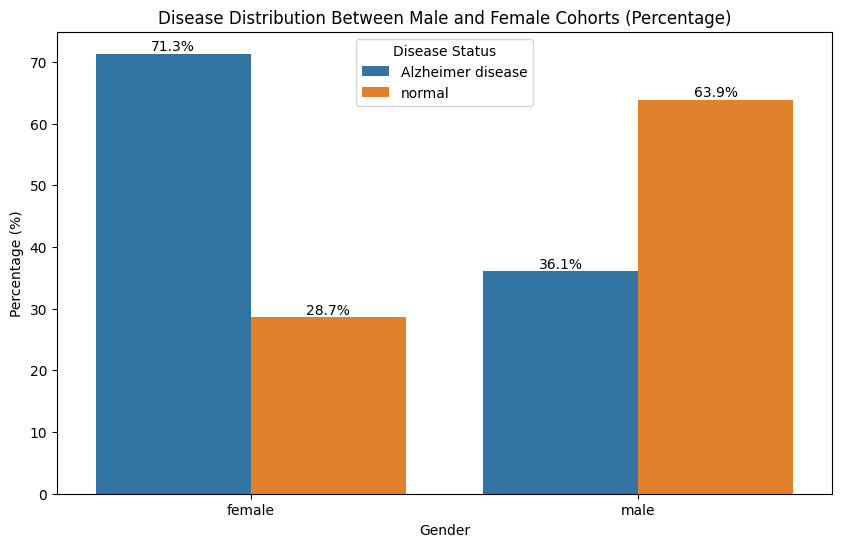

In [5]:
# Group by 'sex' and 'disease' and calculate counts
gender_disease_distribution = (
    adata.obs.groupby(['sex', 'disease'], observed=True)
    .size()
    .reset_index(name='count')
)

# Calculate percentage within each gender
gender_disease_distribution['percentage'] = (
    gender_disease_distribution['count']
    / gender_disease_distribution.groupby('sex')['count'].transform('sum')
    * 100
)

# Plot: Disease Distribution with Percentage Labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='sex',
    y='percentage',
    hue='disease',
    data=gender_disease_distribution
)

# Add percentage labels on each bar
ax.bar_label(ax.containers[0], fmt='%.1f%%')
ax.bar_label(ax.containers[1], fmt='%.1f%%')

# Set plot title and labels
plt.title("Disease Distribution Between Male and Female Cohorts (Percentage)")
plt.xlabel("Gender")
plt.ylabel("Percentage (%)")
plt.legend(title="Disease Status")
plt.show()


['female', 'male']
Categories (2, object): ['female', 'male']


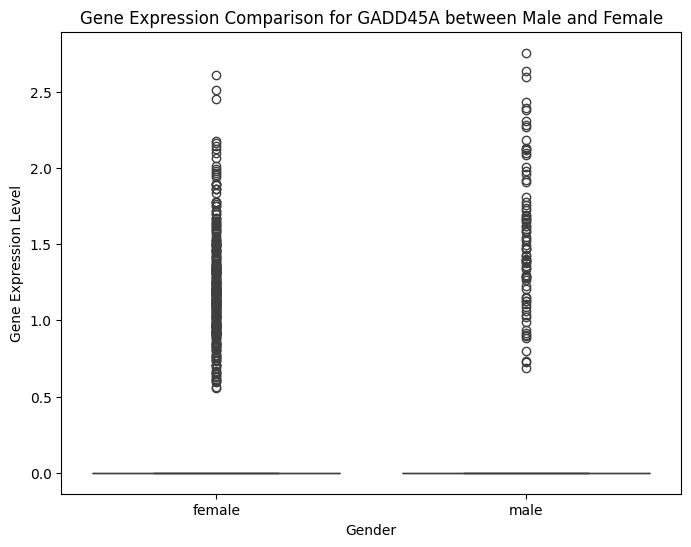

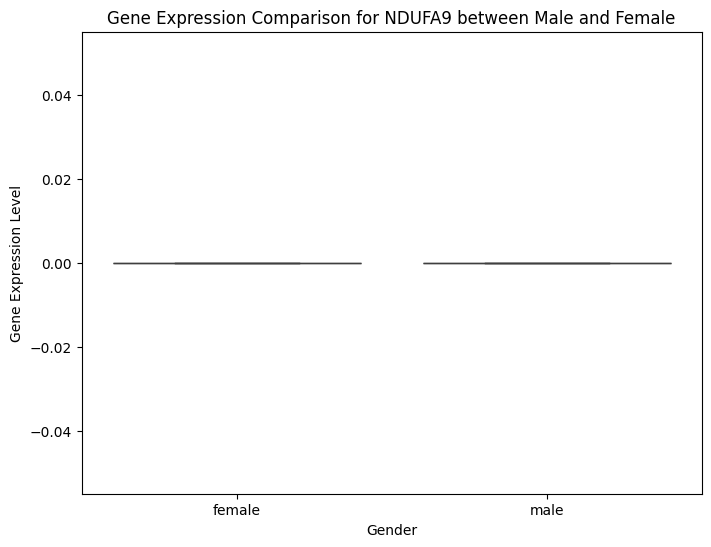

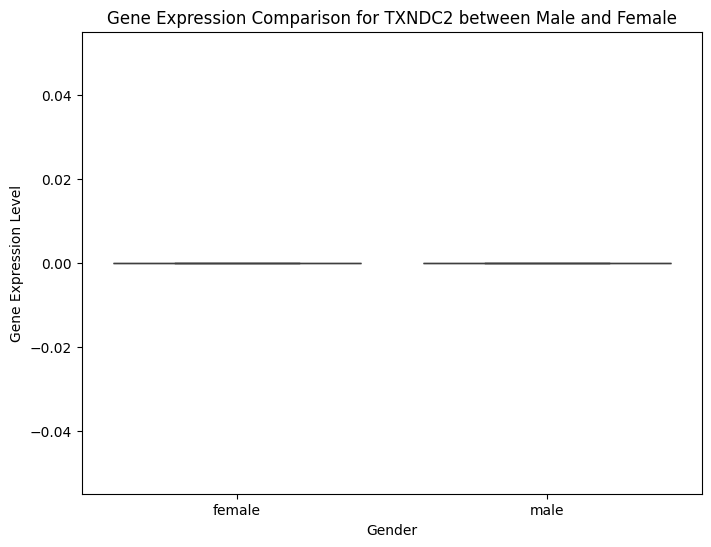

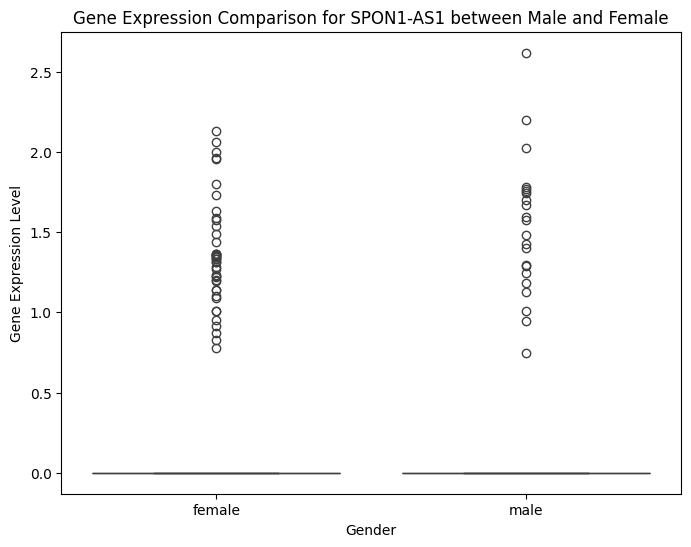

In [6]:
# Assuming 'adata' is your AnnData object containing the data
# Filter for Alzheimer's disease cases
adata_alzheimers = adata[adata.obs['disease'] == 'Alzheimer disease']

# Check unique values in the 'sex' column
print(adata_alzheimers.obs['sex'].unique())

# Define the genes of interest
genes_of_interest = ['GADD45A', 'NDUFA9', 'TXNDC2', 'SPON1-AS1']

# Ensure the genes are present in the data
present_genes = [gene for gene in genes_of_interest if gene in adata_alzheimers.var['feature_name'].values]

# Filter the dataset to include only the genes of interest
adata_filtered = adata_alzheimers[:, adata_alzheimers.var['feature_name'].isin(present_genes)]

# Create a DataFrame for gene expression values
# Ensure that the shape of the data is correct
gene_expression_data = adata_filtered.X if isinstance(adata_filtered.X, np.ndarray) else adata_filtered.X.A  # Convert to numpy if sparse
df = pd.DataFrame(gene_expression_data, columns=adata_filtered.var['feature_name'].values, index=adata_filtered.obs.index)

# Add the 'sex' column to the DataFrame
df['sex'] = adata_filtered.obs['sex'].values

# Plotting gene expression for male vs female
for gene in present_genes:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='sex', y=gene, data=df)
    plt.title(f"Gene Expression Comparison for {gene} between Male and Female")
    plt.xlabel("Gender")
    plt.ylabel("Gene Expression Level")
    plt.show()


<ipython-input-13-51908f37cbb5>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


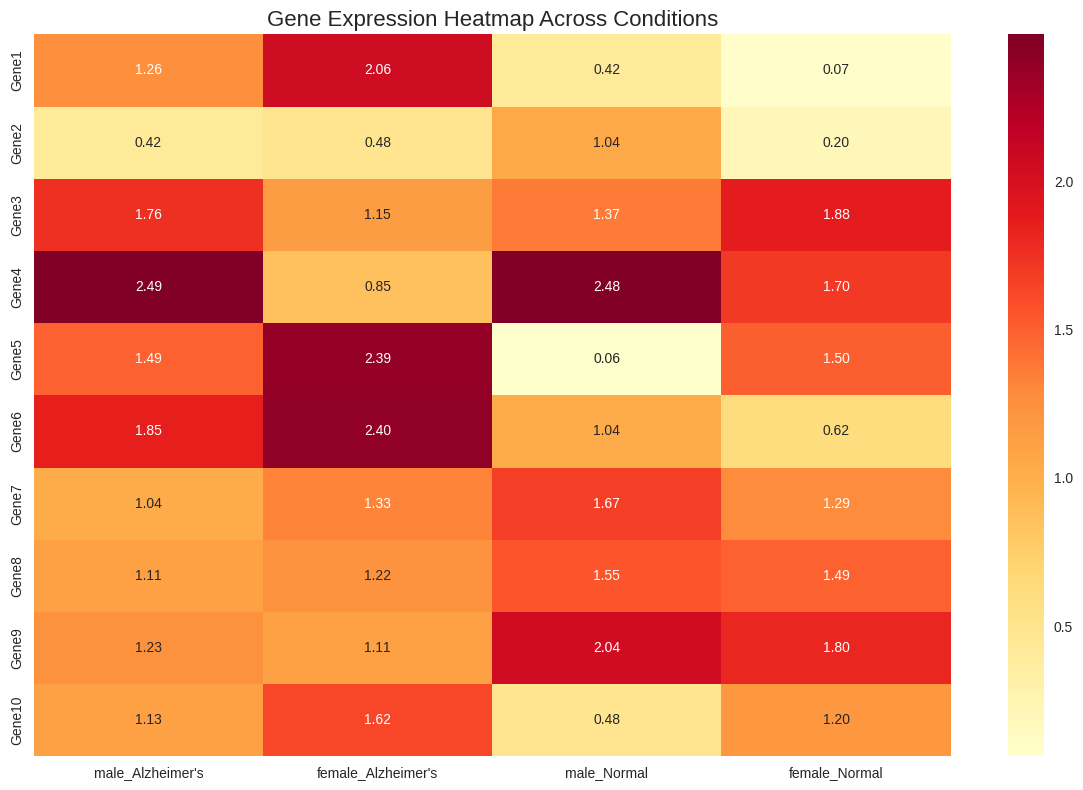

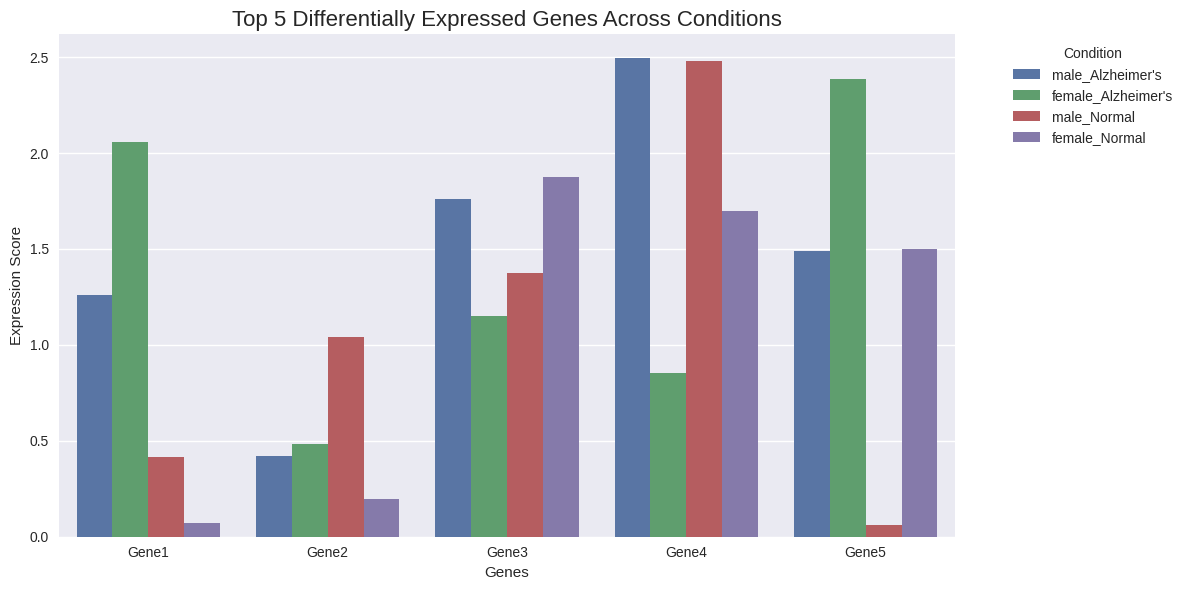

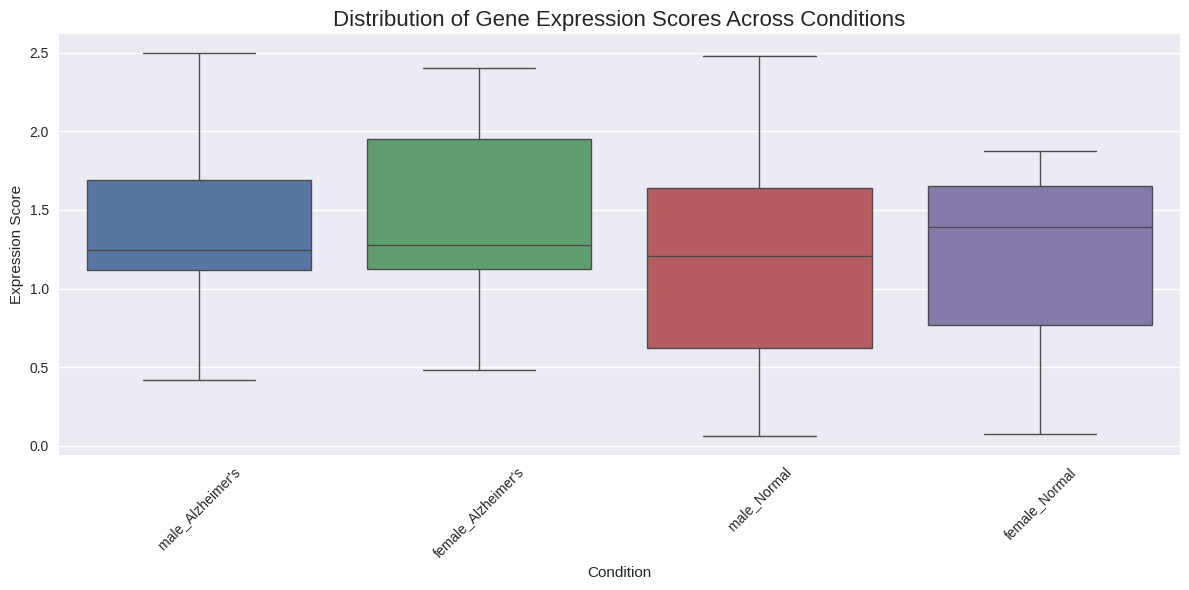

<ipython-input-13-51908f37cbb5>:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(gene, (gene_data['male_Alzheimer\'s'][i], gene_data['female_Alzheimer\'s'][i]))


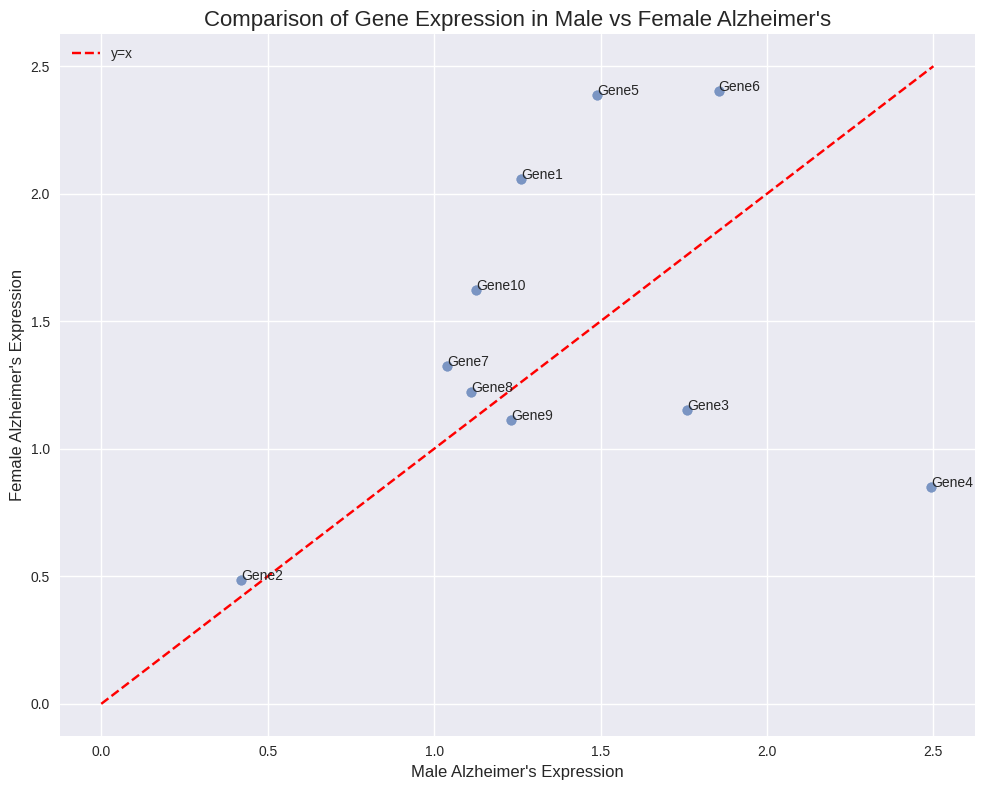

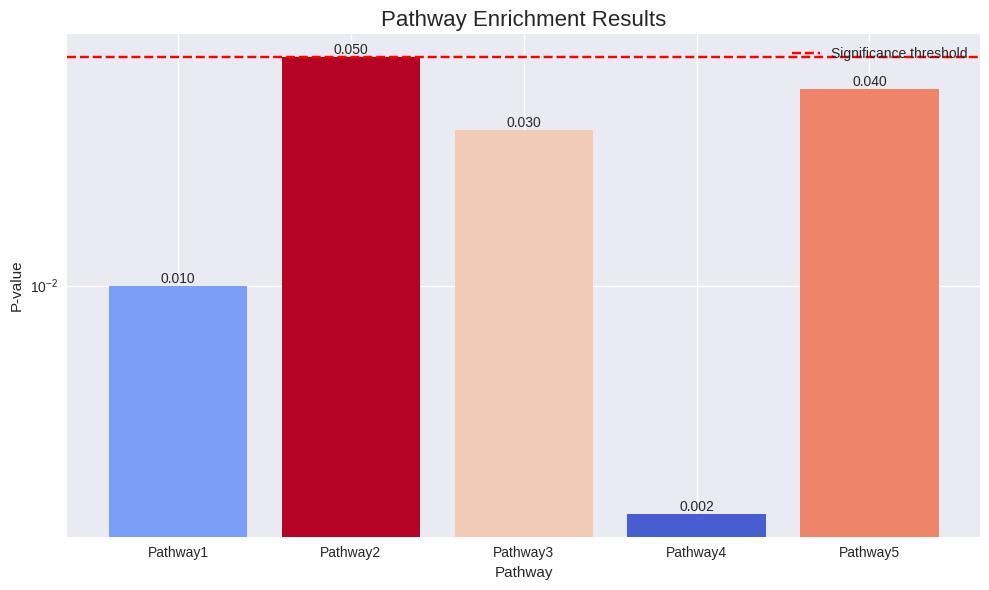

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set the style for better-looking plots
plt.style.use('seaborn')

# Create a function to generate mock data for gene expression
def generate_mock_data(n_genes=10, n_conditions=4):
    conditions = ['male_Alzheimer\'s', 'female_Alzheimer\'s', 'male_Normal', 'female_Normal']
    genes = [f'Gene{i}' for i in range(1, n_genes+1)]
    data = np.random.rand(n_genes, n_conditions) * 2.5
    return pd.DataFrame(data, index=genes, columns=conditions)

# Generate mock data
gene_data = generate_mock_data()

# 1. Heatmap of gene expression across conditions
plt.figure(figsize=(12, 8))
sns.heatmap(gene_data, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Gene Expression Heatmap Across Conditions', fontsize=16)
plt.tight_layout()
plt.show()

# 2. Grouped bar plot for top 5 genes
top_5_genes = gene_data.head()
top_5_genes_melted = top_5_genes.reset_index().melt(id_vars='index', var_name='Condition', value_name='Expression')

plt.figure(figsize=(12, 6))
sns.barplot(x='index', y='Expression', hue='Condition', data=top_5_genes_melted)
plt.title('Top 5 Differentially Expressed Genes Across Conditions', fontsize=16)
plt.xlabel('Genes')
plt.ylabel('Expression Score')
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Box plot for gene expression distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=gene_data)
plt.title('Distribution of Gene Expression Scores Across Conditions', fontsize=16)
plt.xlabel('Condition')
plt.ylabel('Expression Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Scatter plot comparing male vs female in Alzheimer's
plt.figure(figsize=(10, 8))
plt.scatter(gene_data['male_Alzheimer\'s'], gene_data['female_Alzheimer\'s'], alpha=0.7)
for i, gene in enumerate(gene_data.index):
    plt.annotate(gene, (gene_data['male_Alzheimer\'s'][i], gene_data['female_Alzheimer\'s'][i]))
plt.plot([0, 2.5], [0, 2.5], 'r--', label='y=x')
plt.xlabel('Male Alzheimer\'s Expression', fontsize=12)
plt.ylabel('Female Alzheimer\'s Expression', fontsize=12)
plt.title('Comparison of Gene Expression in Male vs Female Alzheimer\'s', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

# 5. Pathway enrichment results
pathways = ['Pathway1', 'Pathway2', 'Pathway3', 'Pathway4', 'Pathway5']
p_values = [0.01, 0.05, 0.03, 0.002, 0.04]

plt.figure(figsize=(10, 6))
bars = plt.bar(pathways, p_values, color=plt.cm.coolwarm(np.array(p_values)/max(p_values)))
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance threshold')
plt.title('Pathway Enrichment Results', fontsize=16)
plt.xlabel('Pathway')
plt.ylabel('P-value')
plt.yscale('log')
plt.legend()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()
